In [19]:
! ls data/


BX-Police.csv     Sales.csv         budget-sample.csv
Iris.csv          Stocks.csv


In [ ]:
!pip install seaborn --upgrade

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [2]:
budget = pd.read_csv('data/budget-sample.csv')

In [3]:
budget

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,826,DEPT OF ENVIRONMENT PROTECTION,BROWN,TRACYANN,NaN,02/23/2004,QUEENS,COMMUNITY ASSISTANT,ACTIVE,37816.0,per Annum,2080.0,37235.48,11.00,206.04,1309.56
1,2020,56,POLICE DEPARTMENT,WONG,CHIWAI,NaN,07/08/2015,BROOKLYN,POLICE OFFICER,ACTIVE,63125.0,per Annum,2080.0,60758.85,343.13,10842.71,10325.31
2,2020,742,DEPT OF ED PEDAGOGICAL,FARRELL,TARA,E,09/09/1996,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,121226.0,per Annum,0.0,118638.72,0.00,0.00,13069.69
3,2020,827,DEPARTMENT OF SANITATION,ATTANASIO,JOSEPH,NaN,10/18/1999,QUEENS,SANITATION WORKER,ACTIVE,77318.0,per Annum,2080.0,75833.83,455.50,28225.89,17602.11
4,2020,744,DEPT OF ED PARA PROFESSIONALS,MCNEIL,GLORIA,D,09/28/1989,MANHATTAN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.00,0.00,5076.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16655,2020,744,DEPT OF ED PARA PROFESSIONALS,PLAGMAN,S,G,03/12/1991,MANHATTAN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.00,0.00,5024.12
16656,2020,742,DEPT OF ED PEDAGOGICAL,EDWARDS,SHADAY,NaN,09/05/2017,MANHATTAN,TEACHER,ACTIVE,69213.0,per Annum,0.0,67591.82,0.00,0.00,624.29
16657,2020,841,DEPARTMENT OF TRANSPORTATION,BUSH,NUANNA,L,06/29/2015,BROOKLYN,ASSISTANT CITY HIGHWAY REPAIRER,ACTIVE,54589.0,per Annum,1480.0,38159.18,89.00,3377.99,1468.94
16658,2020,56,POLICE DEPARTMENT,CARRASCO,ANNA,R,01/10/2007,MANHATTAN,P.O. DA DET GR3,ACTIVE,97324.0,per Annum,2000.0,96798.11,366.93,18689.62,15052.67


In [4]:
budget.isna().sum()

fiscal_year                      0
payroll_number                   0
agency_name                      0
last_name                       18
first_name                      18
mid_init                      6706
agency_start_date                3
work_location_borough            0
title_description                1
leave_status_as_of_june_30       0
base_salary                      0
pay_basis                        0
regular_hours                    0
regular_gross_paid               0
ot_hours                         0
total_ot_paid                    0
total_other_pay                  0
dtype: int64

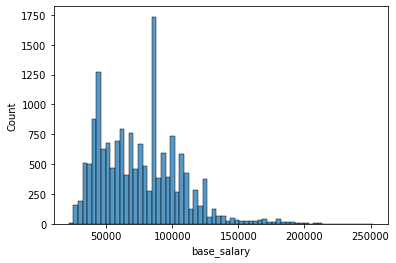

In [5]:
sns.histplot(data = budget, x = 'base_salary')

based on the histogram, most of the based salary are between 50,000 and 100,000.

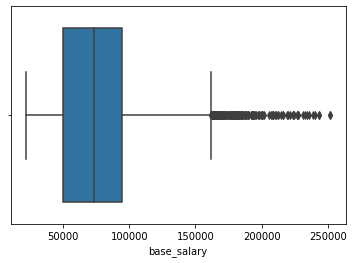

In [6]:
sns.boxplot(data = budget, x = 'base_salary')

we have outliers with base salary greater than 150,000, which means that it is a right-skewed distribution.

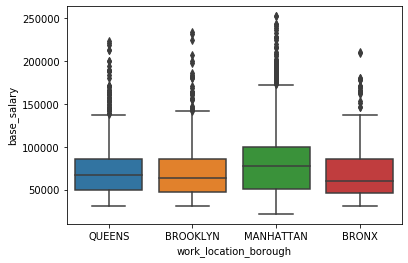

In [8]:
sns.boxplot(data = budget, y = 'base_salary', x = 'work_location_borough')

median base salary for manhattan area is higher than any other borough.

In [10]:
avg_salary = budget.groupby('agency_name')[['base_salary']].mean().reset_index()
avg_salary

,agency_name,base_salary
0,ADMIN FOR CHILDREN'S SVCS,68875.882353
1,ADMIN TRIALS AND HEARINGS,57382.421053
2,BOARD OF CORRECTION,73305.000000
3,BOARD OF ELECTION,55018.659574
4,BOROUGH PRESIDENT-BRONX,112743.000000
...,...,...
82,PUBLIC ADVOCATE,83339.802500
83,QUEENS COMMUNITY BOARD #8,126801.000000
84,TAX COMMISSION,129626.700000
85,TAXI & LIMOUSINE COMMISSION,61411.878788


In [12]:
sorted_avg_salary = avg_salary.sort_values(by = 'base_salary', ascending = False)
sorted_avg_salary

,agency_name,base_salary
67,NYC FIRE PENSION FUND,227786.000000
65,NYC DEPT OF VETERANS' SERVICES,144633.333333
15,CIVIL SERVICE COMMISSION,140000.000000
71,OFFICE OF COLLECTIVE BARGAININ,135000.000000
84,TAX COMMISSION,129626.700000
...,...,...
81,PUBLIC ADMINISTRATOR-KINGS,47705.000000
63,MANHATTAN COMMUNITY BOARD #6,43260.000000
10,BROOKLYN COMMUNITY BOARD #13,40624.000000
39,DEPT OF ED PARA PROFESSIONALS,38640.058753


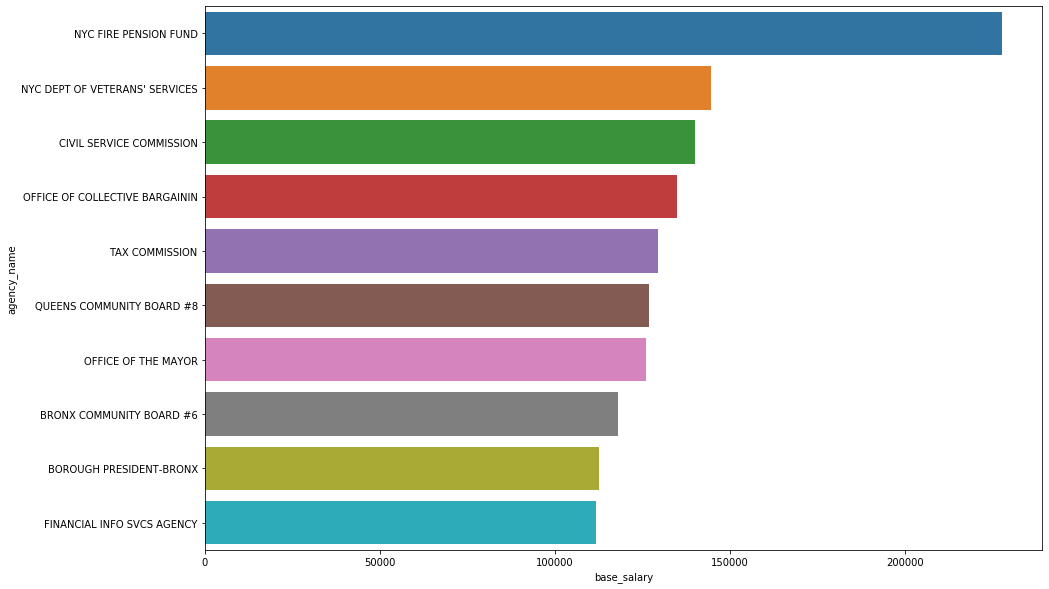

In [18]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'base_salary', y = 'agency_name', data = sorted_avg_salary.head(10))

# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [20]:
police = pd.read_csv('data/BX-Police.csv')
police

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,2016,NaN,POLICE DEPARTMENT,BUICE,WALKEENA,NaN,03/01/2016,BRONX,SCHOOL SAFETY AGENT,ACTIVE,30714.0,per Annum,652.25,8638.87,0.00,0.00,0.00
2570,2021,56.0,POLICE DEPARTMENT,GIRAUD,PIERRE,H,07/11/2012,BRONX,POLICE OFFICER,ACTIVE,85292.0,per Annum,2080.00,85051.84,40.67,1493.25,19652.92
2571,2020,56.0,POLICE DEPARTMENT,JUBRAN,KARAM,E,07/01/2002,BRONX,POLICE OFFICER,ACTIVE,85292.0,per Annum,2080.00,84831.14,335.08,19363.61,17844.64
2572,2018,56.0,POLICE DEPARTMENT,GRAVIUS,CHRISTOPHER,J,01/10/2007,BRONX,POLICE OFFICER,ACTIVE,85292.0,per Annum,2045.72,85058.22,26.92,1800.64,12515.78


In [22]:
grouped_salary = police.groupby('fiscal_year')[['base_salary']].mean().reset_index()
grouped_salary

,fiscal_year,base_salary
0,2015,61299.402898
1,2016,61601.310642
2,2017,65231.981895
3,2018,65147.201387
4,2019,64427.547047
5,2020,67625.692756
6,2021,68584.475576


In [24]:
grouped_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fiscal_year  7 non-null      int64  
 1   base_salary  7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


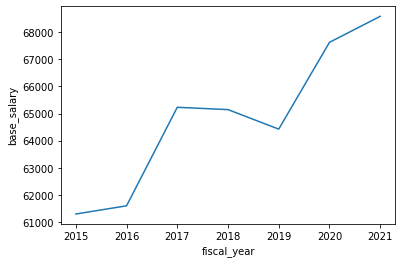

In [25]:
sns.lineplot(x = 'fiscal_year', y = 'base_salary', data = grouped_salary)

possible reason for increasing trend: inflation.

# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [26]:
stock = pd.read_csv('data/Stocks.csv')
stock

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG
...,...,...,...,...,...,...,...,...
247,2021-12-27,662800,2968.530029,2945.000000,2949.270020,2961.280029,2961.280029,GOOG
248,2021-12-28,931200,2967.489990,2918.709961,2967.489990,2928.959961,2928.959961,GOOG
249,2021-12-29,851100,2943.675049,2910.090088,2928.590088,2930.090088,2930.090088,GOOG
250,2021-12-30,648900,2941.250000,2915.169922,2929.000000,2920.050049,2920.050049,GOOG


In [27]:
stock['Ticker'].unique()

array(['GOOG'], dtype=object)

In [30]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Volume     252 non-null    int64  
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Open       252 non-null    float64
 5   Close      252 non-null    float64
 6   Adj Close  252 non-null    float64
 7   Ticker     252 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 15.9+ KB


In [31]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [33]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Volume     252 non-null    int64         
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Open       252 non-null    float64       
 5   Close      252 non-null    float64       
 6   Adj Close  252 non-null    float64       
 7   Ticker     252 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [36]:
grouped_month_stock = stock.groupby(stock['Date'].dt.month)[['Close']].mean().reset_index()
grouped_month_stock

,Date,Close
0,1,1808.383693
1,2,2068.356824
2,3,2059.844785
3,4,2289.842367
4,5,2352.595496
5,6,2501.394098
6,7,2646.785703
7,8,2786.406827
8,9,2837.638091
9,10,2808.973819


In [37]:
grouped_month_stock.rename(columns = {'Date': 'Month'}, inplace = True)

In [38]:
grouped_month_stock

,Month,Close
0,1,1808.383693
1,2,2068.356824
2,3,2059.844785
3,4,2289.842367
4,5,2352.595496
5,6,2501.394098
6,7,2646.785703
7,8,2786.406827
8,9,2837.638091
9,10,2808.973819


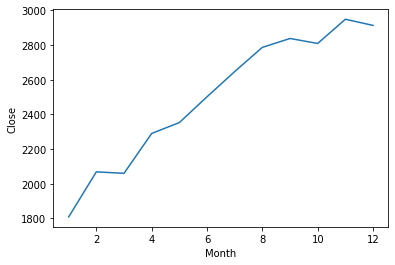

In [41]:
sns.lineplot(x = 'Month', y = 'Close', data = grouped_month_stock)

google stock had an increasing trend for the year of 2021.

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [42]:
sales = pd.read_csv('data/Sales.csv')
sales

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740
5,6,2760,1555,4890,7490,1890,1555
6,7,2980,1120,4780,8980,1780,1120
7,8,3700,1400,5860,9960,2860,1400
8,9,3540,1780,6100,8100,2100,1780
9,10,1990,1890,8300,10300,2300,1890


In [43]:
un_pivot = pd.melt(sales, id_vars = 'month_number', value_vars = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer'])
un_pivot

,month_number,variable,value
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600
...,...,...,...
67,8,moisturizer,1400
68,9,moisturizer,1780
69,10,moisturizer,1890
70,11,moisturizer,2100


In [47]:
un_pivot.rename(columns = {'variable': 'product', 'value': 'sales'}, inplace = True)

In [48]:
un_pivot

,month_number,product,sales
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600
...,...,...,...
67,8,moisturizer,1400
68,9,moisturizer,1780
69,10,moisturizer,1890
70,11,moisturizer,2100


In [51]:
un_pivot['product'].unique()

array(['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo',
       'moisturizer'], dtype=object)

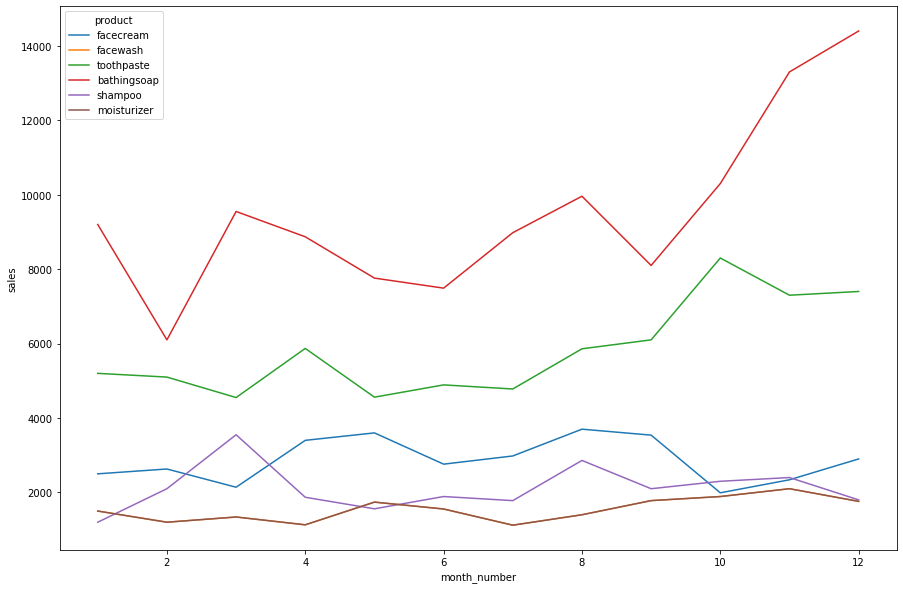

In [50]:
plt.figure(figsize = (15,10))
sns.lineplot(x = 'month_number', y = 'sales', data = un_pivot, hue = 'product')

bathingsoap and toothpast have increasing sales for the past 12 months.

facewash and moisturizer have the same sales. 

In [54]:
total_sales = un_pivot.groupby('month_number')[['sales']].sum().reset_index()
total_sales

,month_number,sales
0,1,21100
1,2,18330
2,3,22470
3,4,22270
4,5,20960
5,6,20140
6,7,20760
7,8,25180
8,9,23400
9,10,26670


In [55]:
total_sales.rename(columns = {'sales': 'total_sales'}, inplace = True)
total_sales

,month_number,total_sales
0,1,21100
1,2,18330
2,3,22470
3,4,22270
4,5,20960
5,6,20140
6,7,20760
7,8,25180
8,9,23400
9,10,26670


In [56]:
merged_sales = pd.merge(un_pivot, total_sales, on = 'month_number', how = 'inner')
merged_sales

,month_number,product,sales,total_sales
0,1,facecream,2500,21100
1,1,facewash,1500,21100
2,1,toothpaste,5200,21100
3,1,bathingsoap,9200,21100
4,1,shampoo,1200,21100
...,...,...,...,...
67,12,facewash,1760,30020
68,12,toothpaste,7400,30020
69,12,bathingsoap,14400,30020
70,12,shampoo,1800,30020


In [57]:
merged_sales['contribution_percentage'] = (merged_sales['sales']/merged_sales['total_sales']) * 100
merged_sales

,month_number,product,sales,total_sales,contribution_percentage
0,1,facecream,2500,21100,11.848341
1,1,facewash,1500,21100,7.109005
2,1,toothpaste,5200,21100,24.644550
3,1,bathingsoap,9200,21100,43.601896
4,1,shampoo,1200,21100,5.687204
...,...,...,...,...,...
67,12,facewash,1760,30020,5.862758
68,12,toothpaste,7400,30020,24.650233
69,12,bathingsoap,14400,30020,47.968021
70,12,shampoo,1800,30020,5.996003


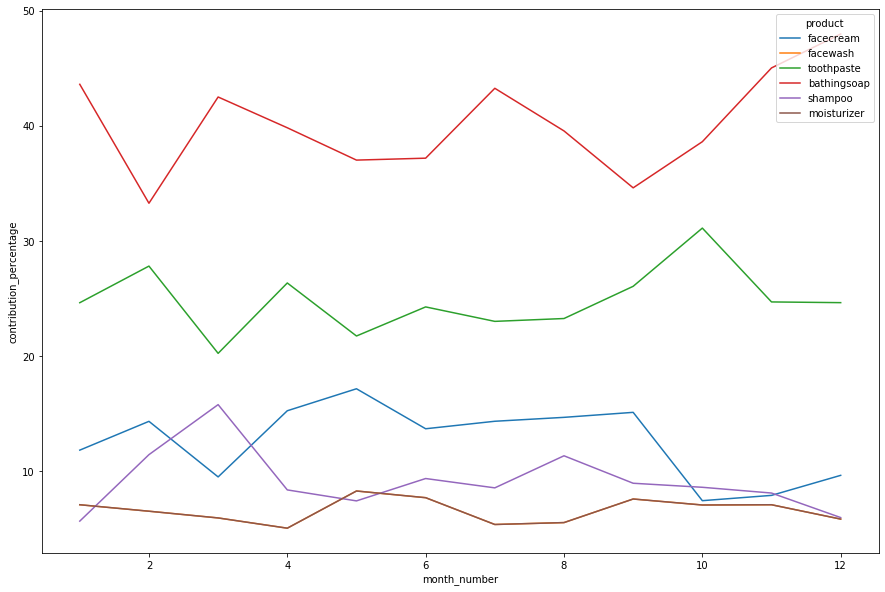

In [58]:
plt.figure(figsize = (15,10))
sns.lineplot(x = 'month_number', y = 'contribution_percentage', data = merged_sales, hue = 'product')

Which item would you recommend they push more of and which item/s would you recommend they stop selling?

based on the graphs, bathingsoap and toothpaste had the majority of sales for the past 12 months. I recommend keep pushing to sell more of these daily necessary items. Facewash and moiturizer had the same sales and the lowest contribution percentage to sales. I recommend stop selling or see if there is a better way to promote these two items.